<a href="https://colab.research.google.com/github/EdwardCaleb/Reinforcement-Learning-CSE437/blob/main/lab2_mdp_EdwardLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Markov Decision Problems

# Exercise 1: Grid World
Compute the value funnction for the example 4.1 in the book.







[ 0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0.]


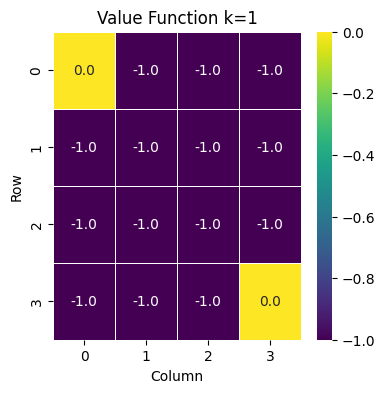

[ 0.     -1.7125 -1.95   -1.95   -1.7125 -1.95   -1.95   -1.95   -1.95
 -1.95   -1.95   -1.7125 -1.95   -1.95   -1.7125  0.    ]


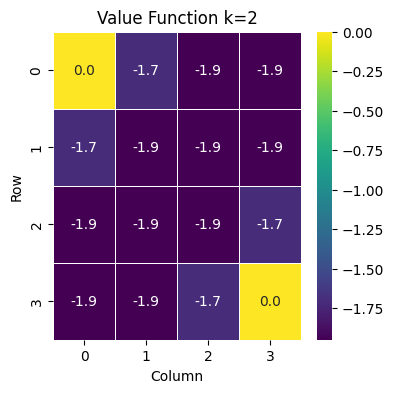

[ 0.         -2.33296875 -2.79609375 -2.8525     -2.33296875 -2.7396875
 -2.8525     -2.79609375 -2.79609375 -2.8525     -2.7396875  -2.33296875
 -2.8525     -2.79609375 -2.33296875  0.        ]


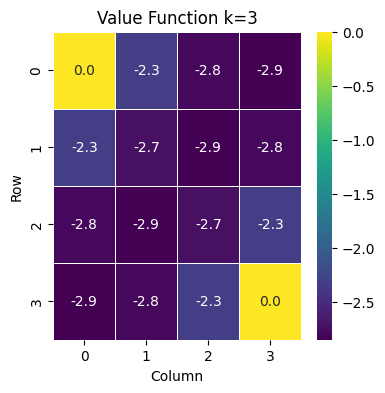

[ 0.         -2.86882812 -3.57308984 -3.68308203 -2.86882812 -3.46309766
 -3.62949609 -3.57308984 -3.57308984 -3.62949609 -3.46309766 -2.86882812
 -3.68308203 -3.57308984 -2.86882812  0.        ]


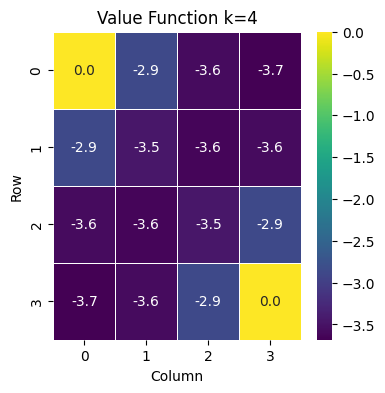

[ 0.         -3.35244121 -4.26669282 -4.44668164 -3.35244121 -4.086704
 -4.34218906 -4.26669282 -4.26669282 -4.34218906 -4.086704   -3.35244121
 -4.44668164 -4.26669282 -3.35244121  0.        ]


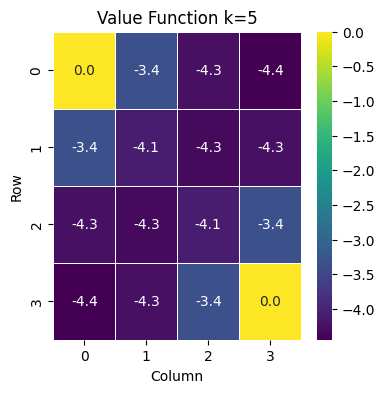

[ 0.         -3.78013653 -4.89690112 -5.13885287 -3.78013653 -4.65494938
 -4.96786349 -4.89690112 -4.89690112 -4.96786349 -4.65494938 -3.78013653
 -5.13885287 -4.89690112 -3.78013653  0.        ]


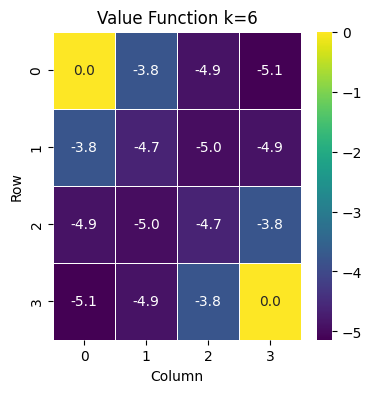

[ 0.         -4.16634692 -5.46114158 -5.76698315 -4.16634692 -5.15530001
 -5.53712899 -5.46114158 -5.46114158 -5.53712899 -5.15530001 -4.16634692
 -5.76698315 -5.46114158 -4.16634692  0.        ]


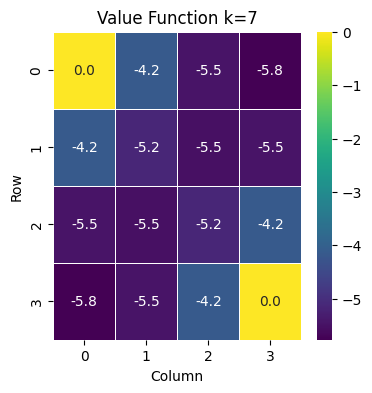

[ 0.         -4.51091227 -5.97125515 -6.33335925 -4.51091227 -5.60915106
 -6.04280976 -5.97125515 -5.97125515 -6.04280976 -5.60915106 -4.51091227
 -6.33335925 -5.97125515 -4.51091227  0.        ]


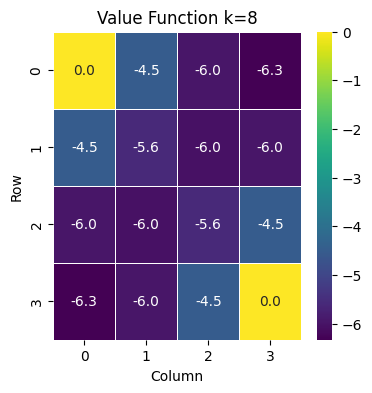

[ 0.         -4.82168814 -6.4288549  -6.84469184 -4.82168814 -6.01301796
 -6.50069295 -6.4288549  -6.4288549  -6.50069295 -6.01301796 -4.82168814
 -6.84469184 -6.4288549  -4.82168814  0.        ]


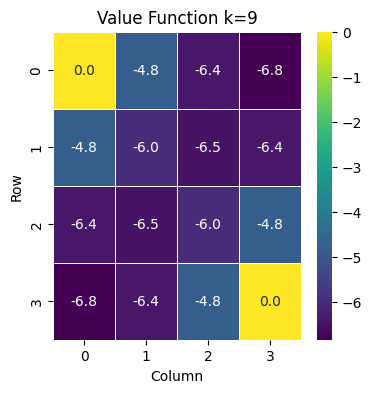

[ 0.         -5.10009574 -6.84153286 -7.3049347  -5.10009574 -6.37813102
 -6.90988961 -6.84153286 -6.84153286 -6.90988961 -6.37813102 -5.10009574
 -7.3049347  -6.84153286 -5.10009574  0.        ]


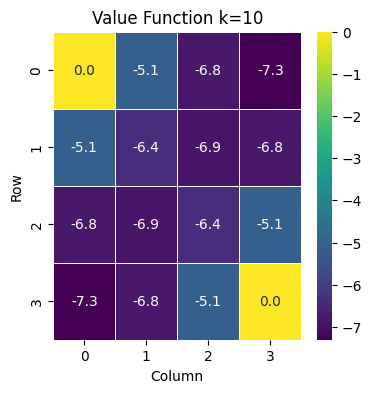

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


V = np.zeros(16)
gamma = 0.95  # Discount factor
V_old = np.zeros(16)

for k in range(10):
  for s in range(16):

    if s==0 or s==15:
      continue

    #### Write your code here #########
    # inside: for s in range(16):

    r, c = divmod(s, 4) # Convert state index into row, col
    neighbors = [] # next states for each action
    for dr, dc in [(-1,0),(0,1),(1,0),(0,-1)]: # Up, right, down, left
        rr, cc = r + dr, c + dc # moving dr and dc
        if rr < 0 or rr > 3 or cc < 0 or cc > 3: # If out of bounds, stay in same state
            rr, cc = r, c
        s2 = rr*4 + cc # Convert back to state index
        neighbors.append(s2)

    # reward = -1 per step, average over 4 actions
    V[s] = sum([(-1 + gamma * V_old[s2]) for s2 in neighbors]) / 4.0 # Bellman Update

  V_old = V.copy()



  ###### PLOT
  # Reshape the 1D value function array into an 8x8 grid
  V_grid = V.reshape((4, 4))

  # Plot the value function as a heatmap
  plt.figure(figsize=(4, 4))
  sns.heatmap(V_grid, annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
  plt.title("Value Function k=%d"%(k+1))
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.show()

# Exercise 2: Grid World
Compute the optimal policy




Greedy policy derived from V (T = terminal):
T ← ← ↓
↑ ← ↓ ↓
↑ ↑ → ↓
↑ → → T


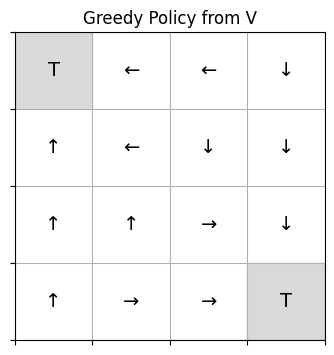

In [14]:
# --- Gridworld setup (4x4) ---
n = 4
terminal_states = {0, 15}

# Actions: up, right, down, left (in this order)
ACTIONS = [(-1,0), (0,1), (1,0), (0,-1)]
ARROWS  = ['↑','→','↓','←']

def to_rc(s):
    """Convert state index -> (row, col)"""
    return divmod(s, n)

def to_s(r, c):
    """Convert (row, col) -> state index"""
    return r*n + c

def next_state(s, a):
    """Transition: deterministic move with wall-bumping behavior"""
    if s in terminal_states:
        return s
    r, c = to_rc(s)
    dr, dc = a
    rr, cc = r + dr, c + dc
    # If move goes out of bounds, agent stays in same cell
    if rr < 0 or rr >= n or cc < 0 or cc >= n:
        rr, cc = r, c
    return to_s(rr, cc)

# --- Greedy policy derived from V ---
policy_grid = np.empty((n, n), dtype=object)
for s in range(n*n):
    r, c = to_rc(s)
    if s in terminal_states:
        policy_grid[r, c] = 'T'  # mark terminal states
    else:
        # Action-value: Q(s,a) = immediate reward (-1) + gamma * V(s')
        q = [ -1.0 + gamma * V[next_state(s, a)] for a in ACTIONS ]
        a_best = int(np.argmax(q))  # choose greedy action
        policy_grid[r, c] = ARROWS[a_best]

# --- Print policy in text format ---
print("Greedy policy derived from V (T = terminal):")
for r in range(n):
    print(' '.join(policy_grid[r]))

# --- (Optional) Draw the policy on a grid with arrows ---
fig, ax = plt.subplots(figsize=(4,4))
ax.set_xlim(0, n); ax.set_ylim(0, n)
ax.set_xticks(range(n+1)); ax.set_yticks(range(n+1))
ax.grid(True)

# Shade terminal states
for s in terminal_states:
    r, c = to_rc(s)
    ax.add_patch(plt.Rectangle((c, n-1-r), 1, 1, color='0.85'))

# Place arrows / T inside each cell
for s in range(n*n):
    r, c = to_rc(s)
    txt = policy_grid[r, c]
    ax.text(c+0.5, n-1-r+0.5, txt, ha='center', va='center', fontsize=14)

ax.set_xticklabels([]); ax.set_yticklabels([])
ax.set_title("Greedy Policy from V")
plt.show()

# Exercise 3: Grid World
In the following gym environment, compute the value function using Monte Carlo.

Run the following code in your local machine. You can run in on colab, but you will not see the animation.

In [17]:
## Install https://github.com/damat-le/gym-simplegrid
!pip install gym-simplegrid

Monte Carlo V(s) under random policy (8x8):
[[-1.82049542 -1.27195957 -0.2655747   0.         -0.50749694 -1.54616455
  -2.24236512 -2.60335213]
 [-2.13030151 -1.72283117 -1.10914431 -0.49514434 -1.36194783 -1.959145
  -2.52201428 -2.88972033]
 [-2.64632143 -2.37344786 -2.13384966  0.         -2.45547882 -2.49261799
  -2.99519385 -3.27493967]
 [-3.15391977 -3.01311484 -3.04452144 -3.29741554 -3.41028058  0.
  -3.64496006 -3.7714353 ]
 [-3.71466743 -3.39479635 -3.19254276  0.         -4.28688423 -4.48223195
  -4.17128165 -4.1724012 ]
 [-4.36214118  0.          0.         -5.30962455 -4.93444309 -4.94174168
   0.         -4.67150731]
 [-5.12487363  0.         -6.05322505 -5.77001434  0.         -5.19626625
   0.         -5.28009995]
 [-5.67154288 -6.01230232 -6.17786922  0.         -5.76050798 -5.41283753
  -5.72712675 -5.60696076]]


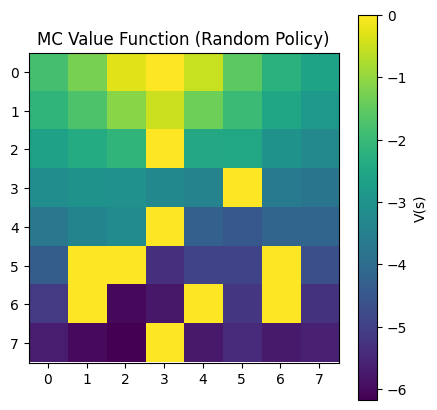

In [31]:
import numpy as np
import gymnasium as gym
import gym_simplegrid
import matplotlib.pyplot as plt

# ------------------------------
# Environment setup (8x8 grid)
# ------------------------------
START_LOC = 15
GOAL_LOC  = 3

# Use headless render for speed while training
env = gym.make('SimpleGrid-8x8-v0', render_mode=None)
obs, info = env.reset(seed=1, options={'start_loc': START_LOC, 'goal_loc': GOAL_LOC})

n_states  = env.observation_space.n
n_actions = env.action_space.n
grid_size = 8  # SimpleGrid-8x8

# ------------------------------
# Build a list of FREE states
# ------------------------------
# The env tracks obstacles; FREE cells are allowed start positions.
obstacles = env.unwrapped.obstacles      # 2D array
FREE      = env.unwrapped.FREE           # constant for free cells

def s_to_rc(s): return divmod(s, grid_size)

# All FREE state indices
free_states = [r*grid_size + c
               for r in range(grid_size)
               for c in range(grid_size)
               if obstacles[r, c] == FREE]

# Ensure goal is FREE; if not, you must pick a different GOAL_LOC
if GOAL_LOC not in free_states:
    raise ValueError(f"GOAL_LOC {GOAL_LOC} is not on a FREE cell.")

# For episode starts, exclude the goal so episodes have length > 0
start_pool = [s for s in free_states if s != GOAL_LOC]

# Also make sure your chosen START_LOC is valid; if not, fall back to random FREE
if START_LOC not in start_pool:
    START_LOC = np.random.default_rng(0).choice(start_pool)

# ------------------------------
# Monte Carlo (First-Visit) setup
# ------------------------------
gamma    = 0.95
episodes = 20000

returns_sum   = np.zeros(n_states, dtype=float)
returns_count = np.zeros(n_states, dtype=int)
V_mc          = np.zeros(n_states, dtype=float)

rng = np.random.default_rng(1234)

def run_episode_random(start_state=None, max_retries=5):
    """Generate one episode under a uniform-random policy from a FREE start."""
    # pick a valid FREE start if none given
    s0 = int(start_state) if start_state is not None else int(rng.choice(start_pool))

    # Some environments validate both start/goal; retry a few times if assertion triggers
    for _ in range(max_retries):
        try:
            obs, info = env.reset(options={'start_loc': s0, 'goal_loc': GOAL_LOC})
            break
        except AssertionError:
            s0 = int(rng.choice(start_pool))
    else:
        # last resort: let env pick its default
        obs, info = env.reset()

    episode = []  # (state, reward)
    terminated = truncated = False
    while not (terminated or truncated):
        a = env.action_space.sample()             # random policy
        next_obs, reward, terminated, truncated, info = env.step(a)
        episode.append((obs, reward))
        obs = next_obs
    return episode

# ------------------------------
# First-Visit Monte Carlo evaluation (random policy)
# ------------------------------
for ep in range(episodes):
    start_state = int(rng.choice(start_pool))
    episode = run_episode_random(start_state=start_state)

    G = 0.0
    visited = set()
    for t in reversed(range(len(episode))):
        s_t, r_tp1 = episode[t]
        G = gamma * G + r_tp1
        if s_t not in visited:
            visited.add(s_t)
            returns_sum[s_t]   += G
            returns_count[s_t] += 1

mask = returns_count > 0
V_mc[mask] = returns_sum[mask] / returns_count[mask]
V_mc[GOAL_LOC] = 0.0

print("Monte Carlo V(s) under random policy (8x8):")
print(V_mc.reshape(8, 8))

# (Optional) heatmap
plt.figure(figsize=(5,5))
plt.imshow(V_mc.reshape(8,8), origin='upper')
plt.colorbar(label='V(s)')
plt.title('MC Value Function (Random Policy)')
plt.xticks(range(8)); plt.yticks(range(8))
plt.show()

/usr/local/lib/python3.12/dist-packages/gymnasium/utils/passive_env_checker.py:283: UserWarning: WARN: RGB-array rendering should return a numpy array in which the last axis has three dimensions, got 4
  logger.warn(


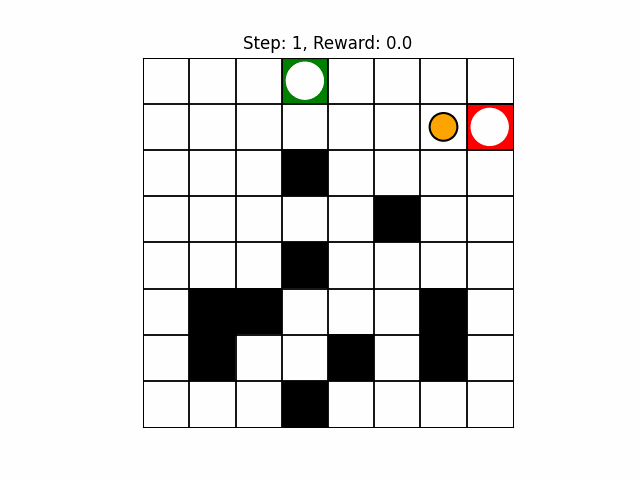

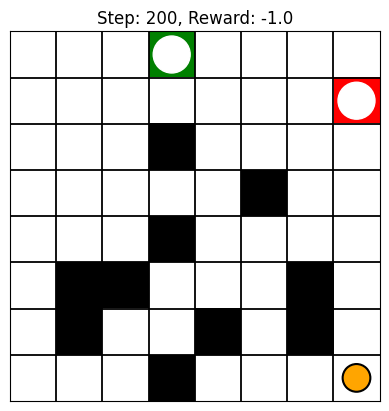

In [34]:
import matplotlib.pyplot as plt
from IPython.display import Image, display
import imageio

frames = []

env = gym.make("SimpleGrid-8x8-v0", render_mode="rgb_array")
obs, info = env.reset(seed=1, options={'start_loc': START_LOC, 'goal_loc': GOAL_LOC})

terminated = truncated = False
while not (terminated or truncated):
    action = env.action_space.sample()   # random action for demo
    obs, reward, terminated, truncated, info = env.step(action)
    frame = env.render()                 # grab RGB frame
    frames.append(frame)

# Save episode as GIF
imageio.mimsave("episode.gif", frames, fps=5)

# Show inline
display(Image(filename="episode.gif"))